## Patients show status for their appointments

### Content:
<ul>
    <li><a href='#intro'> Introduction </a></li>
    <li><a href='#BU'> Business Understanding </a></li>
    <li><a href='#DU'> Data Understanding </a></li>
    <li><a href='#PD'> Prepare Data </a></li>
   <li><a href='#Q1'> First Question </a></li>
    <li><a href='#Q2'> Second Question </a></li>
    <li><a href='#Q3'> Third Question </a></li>
    <li><a href='#Q4'> Fourth Question </a></li></ul>

<h3 id='intro'>Introduction</h3>
In this project we will go through CRISP-DM (Cross Industry Process for Data Mining) Process in solving our data sience problem.<br>
First, <b>Business Understanding</b> I will come up with three questions I interest in it about the data.<br>
Seconed, <b> Data Understanding</b> here we will use data about patient and their show up status in their appointments that will be used to answer the questions. <br>
Third, <b>Prepare Data</b> Perform necessary cleaning, analysis<br>
Forth, results or answers we found to each of the questions.

<h3 id='BU'> Business Understanding</h3>
The questions that I interesed in are:
<ol>
    <li>What is the gender of most patient and their showing up status for each gender?</li>
    <li>What is the show up statue for each patients age?</li>
    <li>Is if SMS massage received affect positively on patient to show?</li>
    <li>What is period between scheduled date and appointment date and is if period short affect positively on patient to show?
 </li>
</ol>

<h3 id='DU'>Data Understanding </h3>

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read the data and show few rows
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
#show information about the data(how many rows and columns, missing data, data types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [18]:
sum(df.duplicated())

0

In [19]:
#Checks Ages values
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [20]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [191]:
df['No-show'].value_counts()/df.shape[0]

No     0.798067
Yes    0.201933
Name: No-show, dtype: float64

 <h3 id='DP'>Prepare Data</h3>

In [21]:
#remove columns not needed
df_clean = df.copy()
columns_to_drop = ['Neighbourhood','Scholarship','Hipertension',
                   'Diabetes','Alcoholism','Handcap']
df_clean = df_clean.drop(columns_to_drop,axis=1)

In [23]:
#check columns 
df_clean.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,No


In [25]:
#remove -1 value in Age column
df_clean = df_clean[df_clean.Age > -1]

In [70]:
#check Age minimum values
df_clean['Age'].min()

0

In [28]:
#change ScheduledDay and AppointmentDay to datetime data type
df_clean['ScheduledDay'] = pd.to_datetime(df_clean['ScheduledDay'])
df_clean['AppointmentDay'] = pd.to_datetime(df_clean['AppointmentDay'])

In [38]:
#check ScheduledDay and AppointmentDay data type
df_clean.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
SMS_received               int64
No-show                   object
dtype: object

<h3 id =Q1> First Question </h3>
<p>What is the gender of most patient and their showing up status for each gender?</p>

In [193]:
#percentage of each patient's gender in each show up status
perce_patient_gender_showup = \
df_clean.groupby(['Gender','No-show'])['PatientId'].count()/df_clean.Gender.shape[0]
perce_patient_gender_showup

Gender  No-show
F       No         0.517956
        Yes        0.132020
M       No         0.280146
        Yes        0.069878
Name: PatientId, dtype: float64

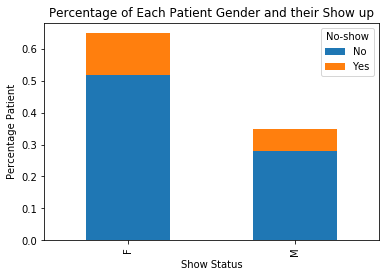

In [194]:
# plt the perncetage above
perce_patient_gender_showup.unstack().plot(kind='bar',stacked=True)
plt.title('Percentage of Each Patient Gender and their Show up')
plt.xlabel('Show Status')
plt.ylabel('Percentage Patient')
plt.show();

<h3 id =Q2> Second Question </h3>
<p> What is the show up statue for each patients age? </p>

In [170]:
#for each patient age count if patient not show up
#first I will split the yes value of No-Show column that mean the patient not show
df_clean_show_yes=df_clean[df_clean['No-show'] == 'Yes']
#df_clean_show_yes.groupby('Age')['PatientId'].count().sort_values

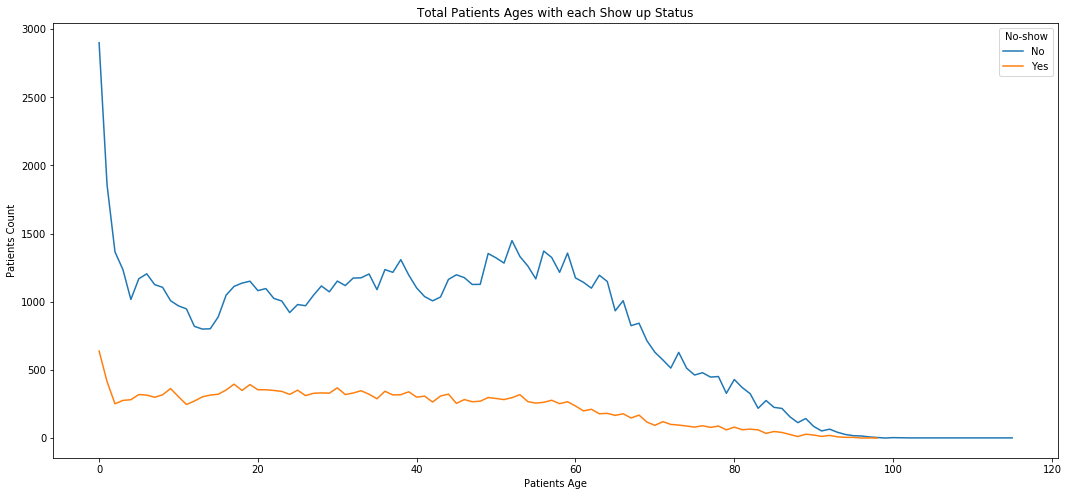

In [167]:
#plot the Total Patients Ages with both Show up Status(yes and no)
df_clean.groupby(['Age','No-show'])['PatientId'].count().unstack().plot(kind='line', figsize=(18,8))
plt.title('Total Patients Ages with each Show up Status')
plt.xlabel('Patients Age')
plt.ylabel('Patients Count')
plt.show();

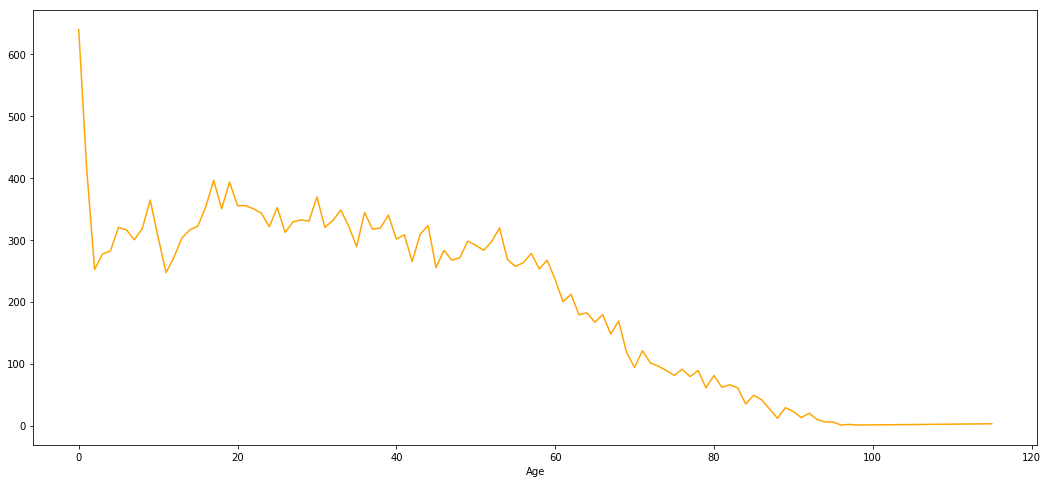

In [173]:
# plot Total Patients Ages with only 'yes' Show up Status
df_clean_show_yes.groupby('Age')['PatientId'].count().plot(kind='line', figsize=(18,8),color='orange');

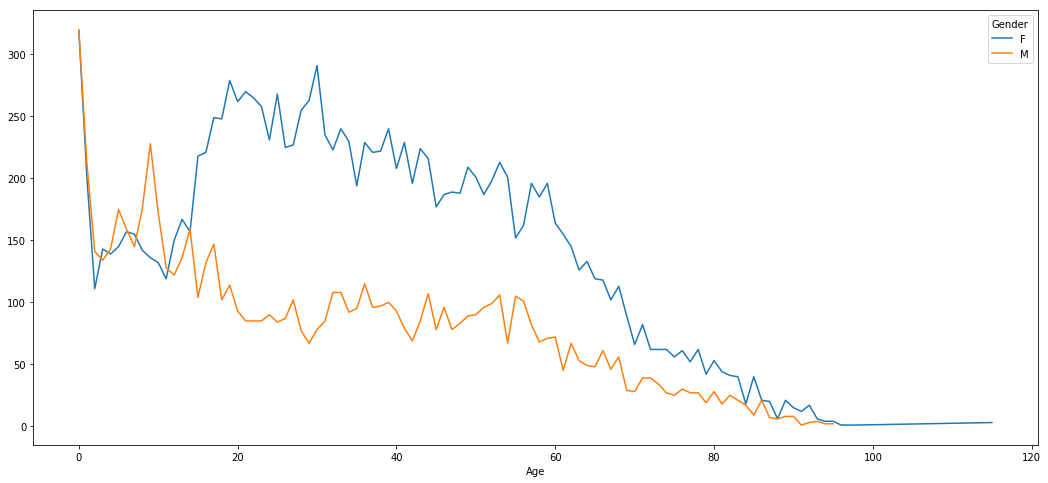

In [181]:
df_clean_show_yes.groupby(['Age','Gender'])['PatientId'].count().unstack().plot(kind='line', figsize=(18,8))

<h3 id =Q3> Third Question </h3>
<p>Is if SMS massage received affect positively on patient to show?</p>

In [183]:
#percentage patient of each show status for each SMS massage recevied status
df_clean.groupby(['No-show','SMS_received'])['PatientId'].count()/df_clean.SMS_received.shape[0]

No-show  SMS_received
No       0               0.565585
         1               0.232517
Yes      0               0.113372
         1               0.088526
Name: PatientId, dtype: float64

In [184]:
#percentage patient of each show status for each SMS massage recevied status and each gender
df_clean.groupby(['No-show','SMS_received','Gender'])['PatientId'].count()/df_clean.SMS_received.shape[0]

No-show  SMS_received  Gender
No       0             F         0.359778
                       M         0.205807
         1             F         0.158178
                       M         0.074339
Yes      0             F         0.071217
                       M         0.042155
         1             F         0.060803
                       M         0.027723
Name: PatientId, dtype: float64

<h3 id =Q4> Fourth Question </h3>
<p>What is period between scheduled date and appointment date and is if period short affect positively on patient to show?</p>

In [96]:
#First we will re-prepare data for this question
# in which we will create column calculate period day between 
#  scheduled date and appointment date
PeriodDay= df_clean['AppointmentDay'] - df_clean['ScheduledDay']
df_clean['PeriodDay']=PeriodDay
pd.to_datetime(df_clean['PeriodDay'])
df_clean['PeriodDay'] = df_clean['PeriodDay'].dt.days
df_clean.describe()

,PatientId,AppointmentID,Age,SMS_received,PeriodDay
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.321029,9.183794
std,2.560943e+14,7.129544e+04,23.110026,0.466874,15.255034
min,3.921784e+04,5.030230e+06,0.000000,0.000000,-7.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,-1.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,3.000000
75%,9.438963e+13,5.725523e+06,55.000000,1.000000,14.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,178.000000


In [117]:
#how many patients that are have scheduled date before appointment date
df_clean[df_clean['PeriodDay'] < -1]['PatientId'].count()

0

In [109]:
#the minimum value of period day is -7 
#this mean there are some patients have scheduled date before appointment date 
#this may by mistake(typo or not updated values) so I'm going to delete these values
df_clean=df_clean[df_clean['PeriodDay'] >= -1]

In [185]:
# precentage of patients in each PeriodDay for each show up status
patient_prec_in_PeriodDay_for_show=\
(df_clean.groupby(['PeriodDay','No-show'])['PatientId'].count().sort_values()
/ df_clean.shape[0])*100

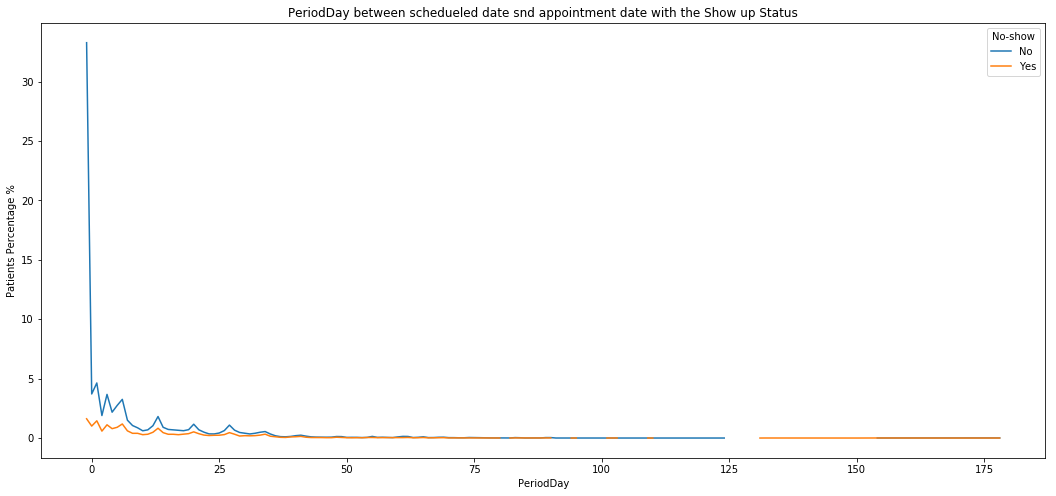

In [130]:
#plot the preiod dayes for each show up status 
patient_prec_in_PeriodDay_for_show.unstack().plot(kind='line', figsize=(18,8))
plt.title('PeriodDay between schedueled date snd appointment date with the Show up Status')
plt.xlabel('PeriodDay')
plt.ylabel('Patients Percentage %')
plt.show();